# Data Visualization with Python Studio

At this point, you should already have connected with the rest of your group to divide up who is going to do what. 

Use this notebook to create your visualizations.

Below, we set up the dataframe with the Goodreads dataset for you. 

If you run this cell, you may get an error that some lines were skipped. Do not worry about that! 

For this studio, we want to focus on creating an effective visualization.

In [6]:
# Here is the setup of the dataframe. Feel free to use .info() or .head() to 
## get a better understanding of what is inside the dataframe!

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
from matplotlib import style

df = pd.read_csv(r"C:\Users\lred1\Desktop\Launchcode\SQL\data-analysis-projects-class-19-and-20\class-19\studio\books.csv", on_bad_lines='skip')

years = []

for y in df['publication_date']:
    date = y.split("/")
    years.append(date[2])

df["year"] = years

df.head()


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004


With your dataframe set up, time to start creating visualizations!

Text(0, 0.5, 'Books (in Tens)')

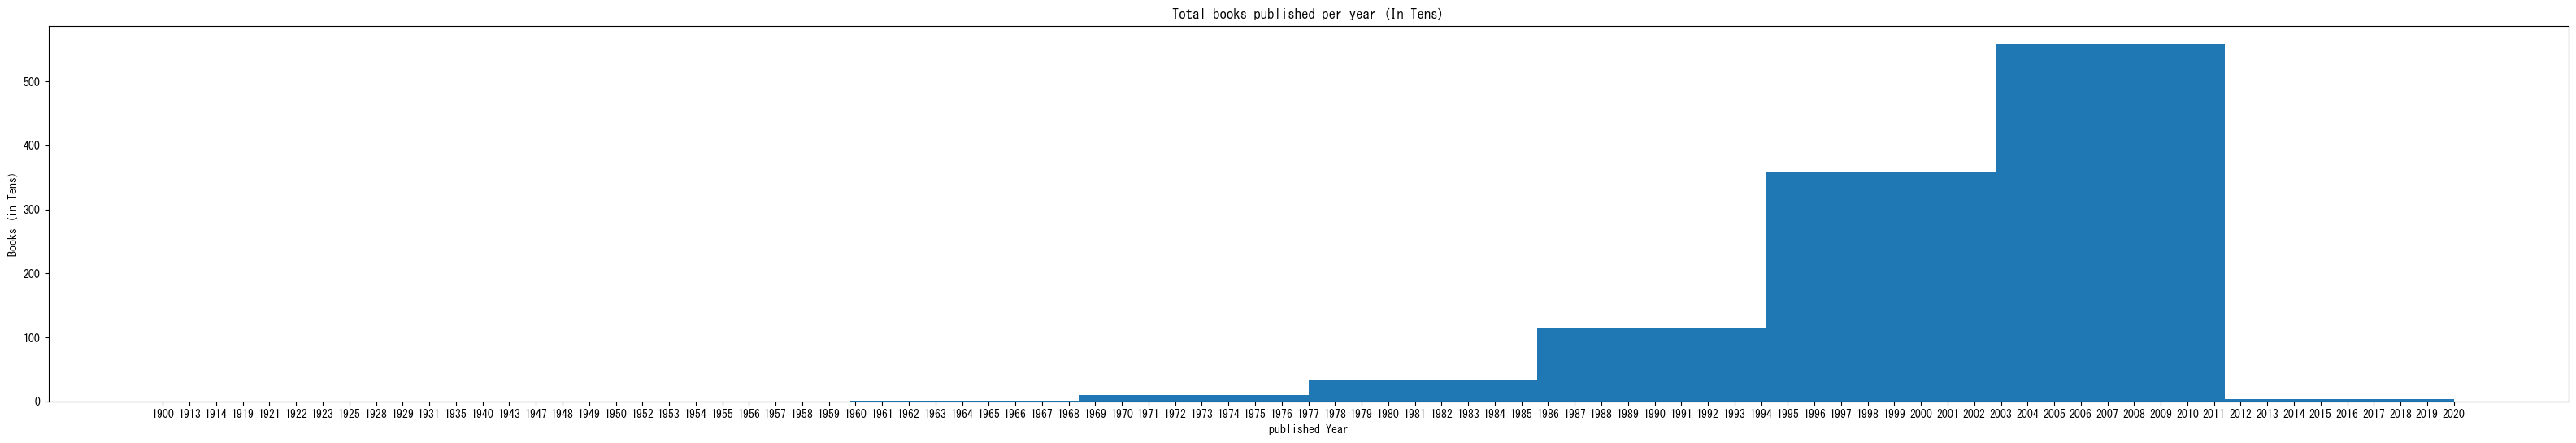

In [13]:
# Use your Python skills to create a visualization here.
#Number of books published per year.
# Code Here
years = np.sort(df["year"].unique())
sum_by_year = df.groupby("year")["bookID"].count().sort_index().values

# converting to billions to make linechart easier to read
for i in range(len(sum_by_year)):
	sum_by_year[i] = sum_by_year[i] /10
    
plt.figure(figsize=(40,6))
#plt.plot(years, sum_by_year)
plt.hist(years,  bins=10, weights=sum_by_year)
#plt.xticks(years[::5], rotation=45)
#plt.gcf().autofmt_xdate()
plt.title("Total books published per year (In Tens)")
plt.xlabel("published Year")
plt.ylabel("Books (in Tens)")


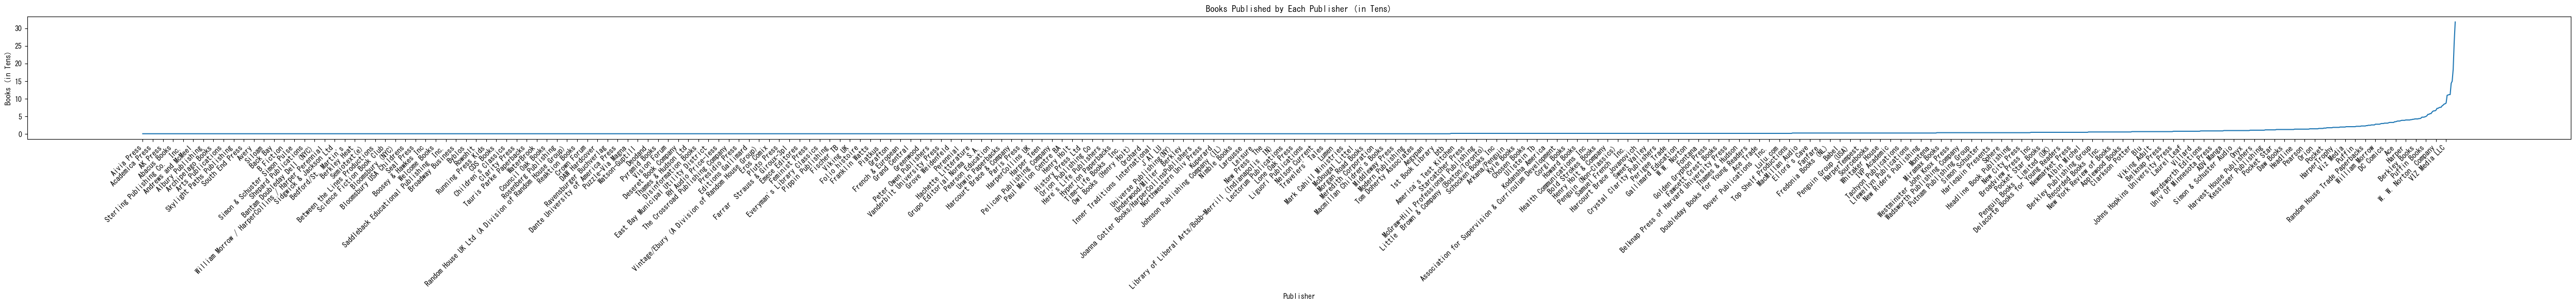

In [29]:
# Use your Python skills to create a visualization here.
#Number of books published by each publisher.

# Code Here
publisher_counts = df.groupby("publisher")["bookID"].count().sort_values()
publisher_counts = publisher_counts / 10

plt.figure(figsize=(50,6))
plt.plot(publisher_counts.index, publisher_counts.values)

# FIXED: use publisher names, not years
plt.xticks(publisher_counts.index[::10], rotation=45, ha="right")

plt.xlabel("Publisher")
plt.ylabel("Books (in Tens)")
plt.title("Books Published by Each Publisher (in Tens)")
plt.tight_layout()
plt.show()
